# Clasificación: Predecir si un pokemon es legendario o no.

In [1]:
# Librerias a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Dataset
data = pd.read_csv('Pokemon_clasificacion.csv')
dvt = data.copy()
dvt

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# Preprocesamiento

Ver que tipo de datos tenemos en el detaset

In [3]:
dvt.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

Eliminando columnas innecesarias

In [4]:
dvt.drop(["#","Type 1","Type 2","Generation","Name"],axis=1,inplace=True)

In [ ]:
dvt

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,318,45,49,49,65,65,45,False
1,405,60,62,63,80,80,60,False
2,525,80,82,83,100,100,80,False
3,625,80,100,123,122,120,80,False
4,309,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,True
796,700,50,160,110,160,110,110,True
797,600,80,110,60,150,130,70,True
798,680,80,160,60,170,130,80,True


Verificar si hay datos faltantes

In [5]:
missing_values = dvt.isnull().sum()
print(missing_values)

Total        0
HP           0
Attack       0
Defense      0
Sp. Atk      0
Sp. Def      0
Speed        0
Legendary    0
dtype: int64


# Balanceo

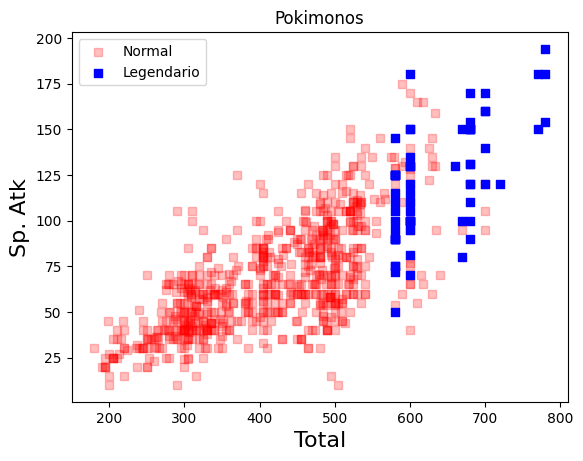

In [6]:
plt.figure()

# Graficamos los que son Pokemon normales
grafica = dvt[dvt['Legendary'] == 0][['Total','Sp. Atk']].values
plt.scatter(grafica[:,0], grafica[:,1], c='red',alpha=0.25,label='Normal',marker='s')

# Graficamos los que sí son legendarios
grafica = dvt[dvt['Legendary'] == 1][['Total','Sp. Atk']].values
plt.scatter(grafica[:,0], grafica[:,1], c='blue',label='Legendario',marker='s')

plt.legend(loc='best')
plt.title('Pokimonos')
plt.xlabel('Total', fontsize=16)
plt.ylabel('Sp. Atk', fontsize=16)
plt.show()

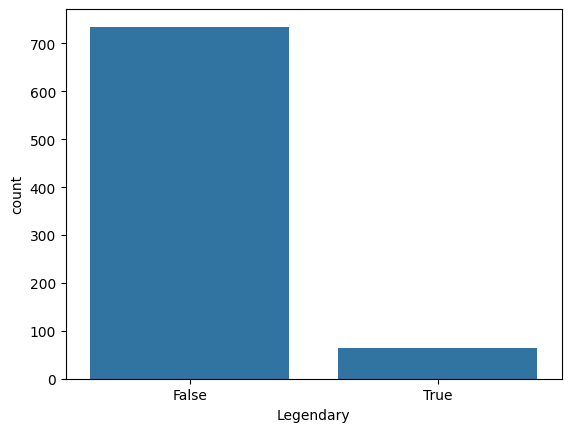

In [7]:
plt.figure()
sns.countplot(x = "Legendary", data = dvt)
plt.show()

In [8]:
noLegendaryy = dvt[dvt["Legendary"]==0].shape[0]
Legendaryy = dvt[dvt["Legendary"]==1].shape[0]
print("Hay {} no legendarios (clase 0)".format(noLegendaryy))
print("Hay {} legendarios (clase 1)".format(Legendaryy))
total = noLegendaryy + Legendaryy
pf= (noLegendaryy / total)*100
pn= (Legendaryy / total)*100
print("Porcentaje clase 0 = {}%".format(np.round(pf,2)))
print("Porcentaje clase 1 = {}%".format(np.round(pn,2)))

Hay 735 no legendarios (clase 0)
Hay 65 legendarios (clase 1)
Porcentaje clase 0 = 91.88%
Porcentaje clase 1 = 8.12%


Tomamos el valor de los legendarios y lo duplicamos

In [9]:
legen_idxs = dvt[dvt["Legendary"]==1].index.to_list()

nolegen_idxs = dvt[dvt["Legendary"]==0].index.to_list()

# seleccionamos aleatoriamente el doble de índices de pokemon legendarios que de normales
random_normal_idxs = np.random.choice(nolegen_idxs, Legendaryy*2, replace= False)

# concatenamos los índices legendarios y normales y creamos el dataframe sub-sampleado
undersampled_indices = np.concatenate([legen_idxs, random_normal_idxs])
undersampled_data = dvt.iloc[undersampled_indices, :]

print(f"Legendario: {len(legen_idxs)}, Normales: {len(random_normal_idxs)}")
undersampled_data.head()

Legendario: 65, Normales: 130


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
156,580,90,85,100,95,125,85,True
157,580,90,90,85,125,90,100,True
158,580,90,100,90,125,85,90,True
162,680,106,110,90,154,90,130,True
163,780,106,190,100,154,100,130,True


Mostramos el balanceo

Número de Pokemon normales (clase 0):  130
Número de legendarios (clase 1):  65
Número total de instancias:  195
Porcentaje clase 0: 66.67
Porcentaje clase 1: 33.33


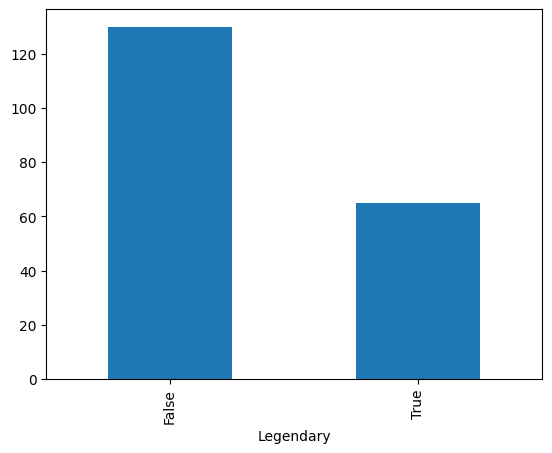

In [10]:
legendary_sampled = len(undersampled_data[undersampled_data["Legendary"]== 1])

normals_sampled = len(undersampled_data[undersampled_data["Legendary"]== 0])

print("Número de Pokemon normales (clase 0): ", normals_sampled)
print("Número de legendarios (clase 1): ", legendary_sampled)
total_sampled = normals_sampled + legendary_sampled
print("Número total de instancias: ", total_sampled)

legendary_percent_sampled = (legendary_sampled / total_sampled)*100
Normal_percent_sampled = (normals_sampled / total_sampled)*100
print(f"Porcentaje clase 0: {round(Normal_percent_sampled,2)}")
print(f"Porcentaje clase 1: {round(legendary_percent_sampled,2)}")

count_sampled = pd.value_counts(undersampled_data["Legendary"], sort= True)
count_sampled.plot(kind= 'bar')
plt.show()

# Regresion logistica

In [11]:
X = undersampled_data.drop("Legendary", axis=1)  # Características
y = undersampled_data["Legendary"]  # Objetivo

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Predice en los datos de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9487179487179487
              precision    recall  f1-score   support

       False       1.00      0.93      0.97        30
        True       0.82      1.00      0.90         9

    accuracy                           0.95        39
   macro avg       0.91      0.97      0.93        39
weighted avg       0.96      0.95      0.95        39

Confusion Matrix:
[[28  2]
 [ 0  9]]


In [14]:
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print("Precisión en los datos de entrenamiento:", train_accuracy)
print("Precisión en los datos de prueba:", test_accuracy)


Precisión en los datos de entrenamiento: 0.9102564102564102
Precisión en los datos de prueba: 0.9487179487179487


# **SVM (Support Vector Machine)**

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

el proceso de sobre-muestreo SMOTE

In [16]:
oversample = SMOTE()
X_oversampled, y_oversampled = oversample.fit_resample(X, y)

In [17]:
print(f"Matriz de features: {X_oversampled.shape}")
print(f"Matriz de etiquetas: {y_oversampled.shape}")

print(Counter(y_oversampled))

Matriz de features: (260, 7)
Matriz de etiquetas: (260,)
Counter({True: 130, False: 130})


In [18]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_oversampled, y_oversampled,
                                                    test_size = 0.25,
                                                    random_state = 359)
print("X_train1: ", len(X_train1))
print("X_test1: ", len(X_test1))
print("y_train1: ", len(y_train1))
print("y_test1: ", len(y_test1))

X_train1:  195
X_test1:  65
y_train1:  195
y_test1:  65


# Probamos con un kernel arbitrario

SVC(C=1, kernel='sigmoid', random_state=0)
0.31794871794871793


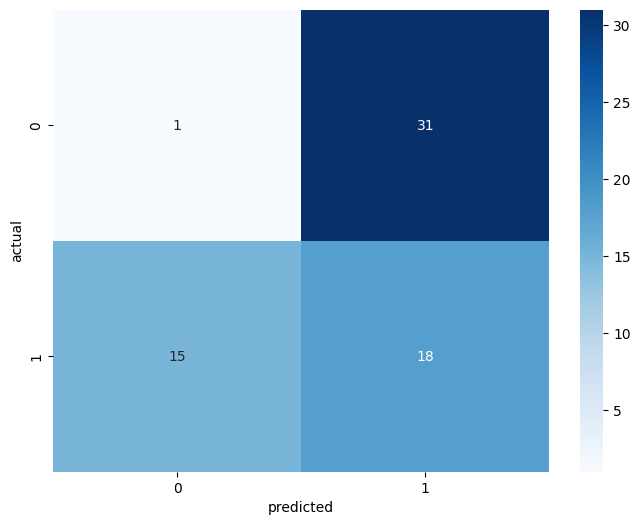

In [33]:
classifier = SVC(C=1, kernel= 'sigmoid', random_state=0, gamma='scale')
d = classifier.fit(X_train1, y_train1)
d4 = classifier.score(X_train1, y_train1)
hola = classifier.predict(X_test1)

print(d)
print(d4)
#print(d3)

conf_mat = confusion_matrix(y_test1, hola)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()


In [38]:
from sklearn.metrics import confusion_matrix

y_pred1 = classifier.predict(X_test1)
CM = confusion_matrix(y_test1, y_pred1)
print(CM)
print(classification_report(y_test1, y_pred1))

[[ 1 31]
 [15 18]]
              precision    recall  f1-score   support

       False       0.06      0.03      0.04        32
        True       0.37      0.55      0.44        33

    accuracy                           0.29        65
   macro avg       0.21      0.29      0.24        65
weighted avg       0.22      0.29      0.24        65



In [36]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
              {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
              {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train1, y_train1)
best_accuracy = grid_search.best_score_
print("La mejor precisión", best_accuracy)

best_parameters = grid_search.best_params_
print(best_parameters)

# Evaluar el mejor modelo
#print(confusion_matrix(y_test1, y_pred1))
#print(classification_report(y_test1, y_pred1))

La mejor precisión 0.9282051282051282
{'C': 1, 'kernel': 'linear'}
[[ 1 31]
 [15 18]]
              precision    recall  f1-score   support

       False       0.06      0.03      0.04        32
        True       0.37      0.55      0.44        33

    accuracy                           0.29        65
   macro avg       0.21      0.29      0.24        65
weighted avg       0.22      0.29      0.24        65



SVC(C=1, kernel='linear', random_state=0)
0.958974358974359


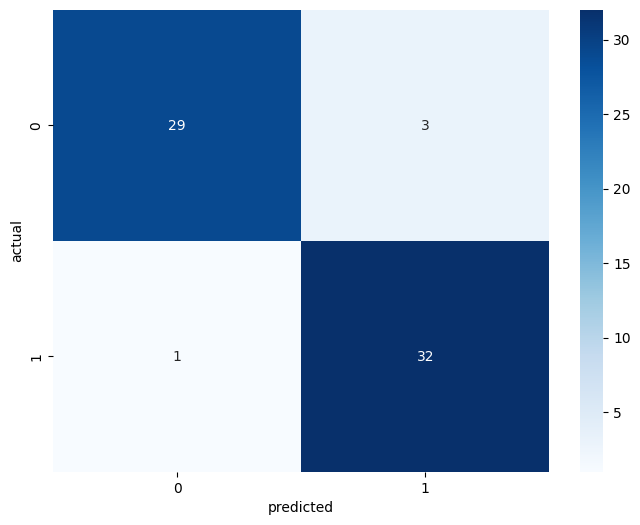

In [42]:
classifier2 = SVC(C=1, kernel= 'linear', random_state=0, gamma='scale')
d1 = classifier2.fit(X_train1, y_train1)
d2 = classifier2.score(X_train1, y_train1)
d3 = classifier2.predict(X_test1)


print(d1)
print(d2)
conf_mat = confusion_matrix(y_test1, d3)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()